## Basic teleportation
*   Step 1: Map your problem to a quantum circuit

### Step 1: Map your problem to a quantum circuit

C:\Users\Tesfu\AppData\Local\Temp\ipykernel_3404\1977000549.py:4: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister


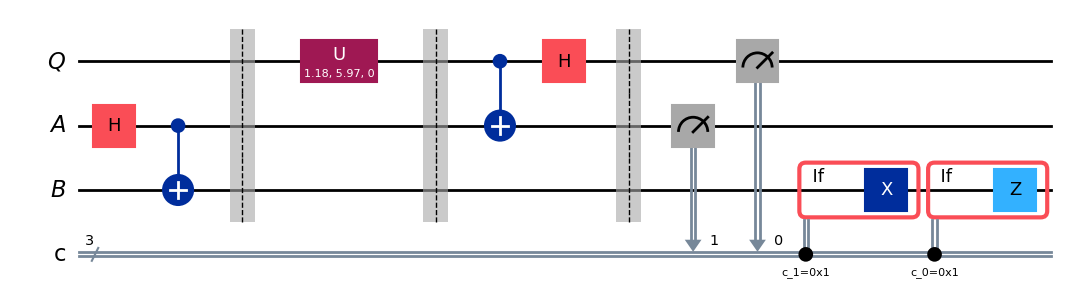

In [1]:
# Step 1: Map your problem to a quantum circuit

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np

# Define registers
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")

cr = ClassicalRegister(3, "c")

qc = QuantumCircuit(secret, Alice, Bob, cr)

# We entangle Alice's and Bob's qubits as in our work above. We apply a Hadamard gate and then a CNOT gate.
# Note that the second argument in the CNOT gate is the target.
qc.h(Alice)
qc.cx(Alice, Bob)

# Inserting a barrier changes nothing about the logic. It just allows us to force gates to be positioned in "layers".
qc.barrier()

# Now we will use random variables to create the secret state. Don't worry about the "u" gate and the details.
np.random.seed(42)  # fixing seed for repeatability
theta = np.random.uniform(0.0, 1.0) * np.pi  # from 0 to pi
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi

# Assign the secret state to the qubit on the other side of Alice's (qubit 0), labeled Q
qc.u(theta, varphi, 0.0, secret)
qc.barrier()

# Now entangle Q and Alice's qubits as in the discussion above.
qc.cx(secret, Alice)
qc.h(secret)
qc.barrier()

# Now Alice measures her qubits, and stores the outcomes in the "classical registers" cr[]
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])

# Now we insert some conditional logic. If Alice measures Q in a "1" we need a Z gate, and if Alice measures A in a "1" we need an X gate (see the table).
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)

qc.draw(output="mpl")

So at the end of all this, Bob definitely has Alice's secret state, but we can't easily verify this with a measurement. In order for a measurement to tell us that we did this correctly, we have to do a trick. We had an operator labeled "U" for "unitary" which we used to prepare Alice's secret state. We can apply the inverse of U at the end of our circuit. If U mapped Alice's $|0\rangle$ state into $\alpha_0 |0\rangle+\alpha_1|1\rangle$, then the inverse of U will map Bob's $\alpha_0 |0\rangle+\alpha_1|1\rangle$ back to $|0\rangle.$ 



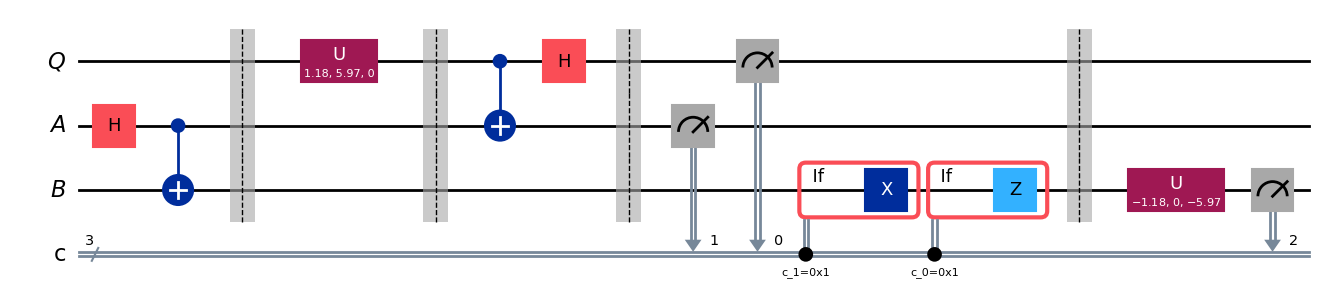

In [2]:
# Add the inverse of U and measure Bob's qubit.
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(Bob, cr[2])  # add measurement gate

qc.draw(output="mpl")

In [3]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum_platform", token="_v9gTYOWfOOwvrDL9E00jnZxsKVyP0k9LwO6bKI9Q1ik")

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# backend = service.backend("ibm_brisbane")
print(backend.name)

C:\Users\Tesfu\AppData\Local\Temp\ipykernel_3404\1219711051.py:2: DeprecationWarning: Using qiskit-ibm-runtime with Python 3.9 is deprecated as of the 0.41.0 release. Support for running qiskit-ibm-runtime with Python 3.9 will be removed in a future release.
  from qiskit_ibm_runtime import QiskitRuntimeService
qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-08-21 07:23:21,023: Default instance not set. Searching all available instances.


ibm_brisbane
